#### EC 01 Volcanic activity detection and noise characterization using machine learning

#### Linear regression prediction of height point.

## Author(s)


- Author1 = {"name": "Myles Mason", "affiliation": "Virginia Tech", "email": "mylesm18@vt.edu", "orcid": "0000-0002-8811-8294"}
- Author2 = {"name": "John Wenskovitch", "affiliation": "Virginia Tech", "email": "jw87@vt.edu", "orcid": "0000-0002-0573-6442"}
- Author3 = {"name": "D. Sarah Stamps", "affiliation": "Virginia Tech", "email": "dstamps@vt.edu","orcid": "0000-0002-3531-1752"}
- Author4 = {"name": "Joshua Robert Jones", "affiliation": "Virginia Tech", "email": "joshj55@vt.edu", "orcid": "0000-0002-6078-4287"}
- Author5 = {"name": "Mike Dye", "affiliation": "Unaffiliated", "email": "mike@mikedye.com", "orcid": " 0000-0003-2065-870X"}


    

## Purpose

This Jupyter notebook explores methods towards characterizing noise and eventually predicting volcanic activity for [Ol Doinyo Lengai](http://tzvolcano.chordsrt.com)
 (an active volcano in Tanzania) with machine learning. Machine learning is a powerful tool that enables the automatization of complex mathematical and analytical models. In this Jupyter notebook, the components are time, height, latitude, and longitude. The predicted component values are the following heights. This project uses Global Navigation Satellite System (GNSS) data from the EarthCube CHORDS portal TZVOLCANO (Stamps et al. 2016; Daniels et al., 2016; Kerkez et al., 2016), which is the online interface for obtaining open-access real-time positioning data collected around Ol Doinyo Lengai(http://tzvolcano.chordsrt.com). The bulk of the project is the exploration of the data and later prediction of height points. The station that this project analyzes is OLO1 for days 12/16/2020 and 04/16/2021.  

## Technical contributions
- The training of the models and analysis uses basic linear algebra and statistics 
- The main libraries used (NumPy and pandas) are both libraries for data manipulation and linear algebra 
- The CHORDS site linked above is the location of the data and the interface of [CHORDS](http://tzvolcano.chordsrt.com)
- Implementation of Linear Regression for prediction on time-series data

## Methodology
The desired data was imported and selected. Pre-processing and cleaning of the data occurred. The information was then visualized for better analysis along with statistical metrics running. Finally, linear regression models were built and analyzed for the data.


## Results
This notebook explored predicting height data from the TZVOLCANO CHORDS portal using Linear Regression from different days. It also evaluates how much test data is needed to best predict height data. We find that having 10% test data yields the best results for predictions with the Mean Squared Error of 8.325e-5% . For predictions from data inputted and predicted from a single day we find the 75% test data yields the best results with an average error of -1.074e-4 meters.

## Funding

- Award1 = {"agency": "National Science Foundation EarthCube Program", "award_code": "1639554", "award_URL": https://www.nsf.gov/awardsearch/showAward?AWD_ID=1639554&HistoricalAwards=false }
- Award2 = {"agency": "Virginia Tech Academy of Integrated Sciences Hamlett Undergraduate Research Award", "award_code": "44672", "award_URL": ""}

## Keywords


keywords=["tzDF", "Linear Regression", "Concat", "Transpose","Mean Squared Error(MSE)"]

## Citation
Mason, Myles, John Wenskovitch, D. Sarah Stamps, Joshua Robert Jones,  Mike Dye (2021), EC_01_Volcanic_activity_detection_and_noise_characterization_using_machine learning, EarthCube Annual Meeting.

## Suggested next steps
The next step for this notebook will be increasing the inputs for the prediction model. More analysis of the noise will be crucial in the next step for further volcanic activity prediction. They are explicitly generating synthetic data that will mimic volcanic activity.
## Acknowledgements
- Virginia Tech Department of Geosciences 
- Alice and Luther Hamlet

# Setup

## Library import


In [1]:
# Data manipulation
import pandas as pd
import json
import numpy as np
import math
from datetime import datetime as dt


# Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




# Parameter definitions
- 'tzDF': intial dataframe contains 12/06/2020 data 
- 'tz2DF': secondary dataframe contains 04/16/2021 data
- 'ONE_THROUGH_TWENTY': array of values in tzDF["measurements_height"] used for prediction
- 'TWO_THROUGH_TWENTY_ONE':array of values in tzDF["measurements_height"] used for prediction
- 'THREE_THROUGH_TWENTY_TWO': array of values in tzDF["measurements_height"] used for prediction
- 'FOUR_THROUGH_TWENTY_THREE': array of values in tzDF["measurements_height"] used for prediction
- 'DECEMBER_SERIES_X': inputted height for 12/16/2020 data for Linear Regression 
- 'DECEMBER_SERIES_Y': target height data for 12/16/2020
- 'APRIL_SERIES_X': inputted height data for 04/16/2021
- 'APRIL_SERIES_Y': target height data for 04/16/2021
- 'APRIL_PREDICTION': Predicted values from the two days



# Data import


The CHORDS notebook portal is where the data is acessed.

In [2]:
#Import for JSON files for manipulation
''' Both files are station one, but the first date is December 16,2020
    while the second date is April 16 2021.
'''
with open('2021-01-01_1_tzv.json', 'r', encoding="utf-8") as infile:
    tzList = json.load(infile)
#with open('OLO1_12_16_20.geojson', 'r', encoding="utf-8") as infile:
 #   tz2List = json.load(infile)

#with open('OLO1_4_16_21.geojson', 'r', encoding="utf-8") as infile:
 #   tz2List = json.load(infile)
    
#with open('OLO1_1_1_21.geojson', 'r', encoding="utf-8") as infile:
 #   tzXList = json.load(infile)

# Data processing and analysis


In [3]:
#Convert both JSON's into  a partially-flattened pandas DataFrame   
tzDF =  pd.json_normalize(tzList["features"][0]["properties"]["data"], sep='_')
#tzCleanDF =  pd.json_normalize(tz2List["features"][0]["properties"]["data"], sep='_')
#Overview of numerical elements of the data
#print(tzDF.describe())
tzList
#tzCleanDF

{'features': [{'geometry': {'coordinates': [35.95, -2.7342, 988.0],
    'type': 'Point'},
   'properties': {'affiliation': 'Virginia Tech, Ardhi University, KIGAM',
    'chords_version': '1.0.1',
    'chords_version_sha': '9301241',
    'data': [{'measurements': {'height': 988.271,
       'lat': 2.7342,
       'lon': 35.950217},
      'test': 'false',
      'time': '2021-01-01T00:03:52Z'},
     {'measurements': {'height': 988.267, 'lat': 2.7342, 'lon': 35.950217},
      'test': 'false',
      'time': '2021-01-01T00:03:53Z'},
     {'measurements': {'height': 987.801, 'lat': 2.734201, 'lon': 35.950219},
      'test': 'false',
      'time': '2021-01-01T00:03:54Z'},
     {'measurements': {'height': 987.804, 'lat': 2.734201, 'lon': 35.950219},
      'test': 'false',
      'time': '2021-01-01T00:03:55Z'},
     {'measurements': {'height': 988.358, 'lat': 2.734202, 'lon': 35.95022},
      'test': 'false',
      'time': '2021-01-01T00:03:56Z'},
     {'measurements': {'height': 988.362, 'lat': 2

From the .describe call looking at our data frame, there does not seem to be much variation in columns measurements_lat and measurements_lon because the DataFrame is from a single day. The reason for choosing to explore the measurements_height column in this notebook is because of the hypothesis that the surface will uplift if there is magma reservoir inflation or the surface will subside if there is magma reservior deflation. From viewing the data frame, the time column is in a time series form with extra separator variables "T" and "Z" in the following two cells; we will convert the timestamp column into an integer form for easy manipulation.

 Function to convert timestamp column of tzDF and tz2DF from time series to an integer for easy manipulation.

In [4]:
def timeconvertfunc(timestamp):
 #The format of tzDF["measurments_height] is in string form and timeseries so this method make it an integer"
  ts = pd.Timestamp(timestamp, tz=None).to_pydatetime()
  ts = 3600*ts.hour + 60*ts.minute + ts.second

  return ts
#Applying above method to the two data frames
tzDF["timeconvert"] = tzDF["time"].apply(timeconvertfunc)
#tzCleanDF["timeconvert"] = tzCleanDF["time"].apply(timeconvertfunc)
tzDF

,test,time,measurements_height,measurements_lat,measurements_lon,timeconvert
0,false,2021-01-01T00:03:52Z,988.271,2.734200,35.950217,232
1,false,2021-01-01T00:03:53Z,988.267,2.734200,35.950217,233
2,false,2021-01-01T00:03:54Z,987.801,2.734201,35.950219,234
3,false,2021-01-01T00:03:55Z,987.804,2.734201,35.950219,235
4,false,2021-01-01T00:03:56Z,988.358,2.734202,35.950220,236
...,...,...,...,...,...,...
51269,false,2021-01-01T23:59:47Z,988.116,2.734205,35.950217,86387
51270,false,2021-01-01T23:59:48Z,988.115,2.734205,35.950217,86388
51271,false,2021-01-01T23:59:53Z,988.111,2.734205,35.950217,86393
51272,false,2021-01-01T23:59:54Z,988.119,2.734205,35.950217,86394


## Visualization of basic statistics from measurements_height and linear regression

In the code block below the four series objects are partitions of the measurements_height column in the tzDF DataFrame. We create these partitions to feed into a linear regression model for predictions.

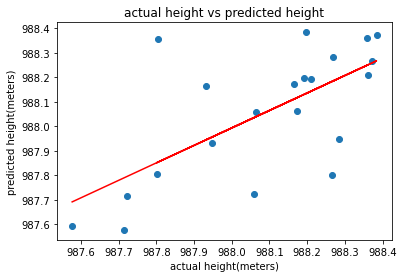

The b value is 0.7135
The m value is 283.1
The R^2 value is 0.4398


In [5]:
# Series from the first Data Frame

ONE_THROUGH_TWENTY = tzDF["measurements_height"].loc[1:21].values.reshape(-1,1)
TWO_THROUGH_TWENTY_ONE = tzDF["measurements_height"].loc[2:22].values.reshape(-1,1)
THREE_THROUGH_TWENTY_TWO =tzDF["measurements_height"].loc[3:23].values.reshape(-1,1)
FOUR_THROUGH_TWENTY_FOUR = tzDF["measurements_height"].loc[4:24].values.reshape(-1,1)

#Linear Regression model on columns 1-20 and 2-21

lm = LinearRegression()
lm.fit(ONE_THROUGH_TWENTY ,TWO_THROUGH_TWENTY_ONE)
y_pred = lm.predict(ONE_THROUGH_TWENTY)
plt.xlabel("actual height(meters)")
plt.ylabel("predicted height(meters)")
plt.title("actual height vs predicted height")
plt.scatter(ONE_THROUGH_TWENTY,TWO_THROUGH_TWENTY_ONE)
plt.plot(ONE_THROUGH_TWENTY,y_pred,color="red")
plt.show()

#Method to round for sigfigs
def to_precision(x,p):
    x = float(x)
    if x == 0.:
        return "0." + "0"*(p-1)
    out = []
    if x < 0:
        out.append("-")
        x = -x
    e = int(math.log10(x))
    tens = math.pow(10, e - p + 1)
    n = math.floor(x/tens)
    if n < math.pow(10, p - 1):
        e = e -1
        tens = math.pow(10, e - p+1)
        n = math.floor(x / tens)
    if abs((n + 1.) * tens - x) <= abs(n * tens -x):
        n = n + 1
    if n >= math.pow(10,p):
        n = n / 10.
        e = e + 1
    m = "%.*g" % (p, n)
    if e < -2 or e >= p:
        out.append(m[0])
        if p > 1:
            out.append(".")
            out.extend(m[1:p])
        out.append('e')
        if e > 0:
            out.append("+")
        out.append(str(e))
    elif e == (p -1):
        out.append(m)
    elif e >= 0:
        out.append(m[:e+1])
        if e+1 < len(m):
            out.append(".")
            out.extend(m[e+1:])
    else:
        out.append("0.")
        out.extend(["0"]*-(e+1))
        out.append(m)

    return "".join(out)
print("The b value is",to_precision(lm.coef_[0][0],4))

print("The m value is",to_precision(lm.intercept_[0],4))


print("The R^2 value is",to_precision(lm.score(ONE_THROUGH_TWENTY,TWO_THROUGH_TWENTY_ONE),4),)



From the above model using the first through the twentieth column and second, through the twenty-second column, we yield a Coefficient of Correlation (R^2) value of about 0.73, which shows a positive correlation between the two inputs. So about 37% of the variation is residing in the residual.

## TWO_THROUGH_TWENTY_ONE and THREE_THROUGH_TWENTY_TWO 

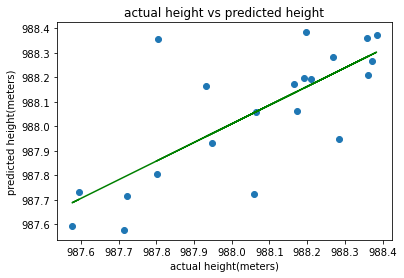

This is the b value 0.7616
This is the m value 235.5
This is the R^2 0.5641


In [6]:

lm = LinearRegression()
lm.fit(TWO_THROUGH_TWENTY_ONE ,THREE_THROUGH_TWENTY_TWO)
y_pred1 = lm.predict(TWO_THROUGH_TWENTY_ONE)
plt.scatter(TWO_THROUGH_TWENTY_ONE,THREE_THROUGH_TWENTY_TWO)
plt.plot(TWO_THROUGH_TWENTY_ONE,y_pred1,color="green")
plt.xlabel("actual height(meters)")
plt.ylabel("predicted height(meters)")
plt.title("actual height vs predicted height")
plt.show()


print("This is the b value",to_precision(lm.coef_[0][0],4))
print("This is the m value",to_precision(lm.intercept_[0],4))
print("This is the R^2",to_precision(lm.score(TWO_THROUGH_TWENTY_ONE,THREE_THROUGH_TWENTY_TWO),4))




From the above model using the first through the twentieth column and the second through the twenty-second column, we yield a Coefficient of Correlation (R^2) value of about 0.72, which shows a positive correlation between the two inputs. So about 38% of the variation is residing in the residual.

## Linear Regression from single day

The following code chunk uses  Linear Regression (specifically with rows of height measurement) for  one_Through_Twenty,two_Through_Twenty_One, and 
three_Through_Twenty_Two. The data frame used for the model is tzDF, and we display the predicted values versus actual values.

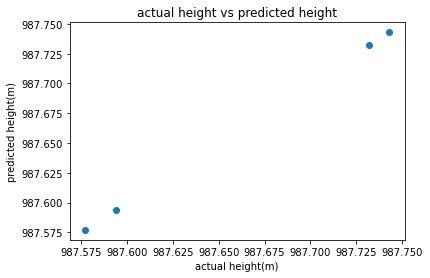

measurements_height    0.0
measurements_height    0.0
measurements_height    0.0
measurements_height    0.0
Name: 21, dtype: float64


In [7]:
#Set up series object for partions in the dataframe
ONE_THROUGH_TWENTY = tzDF["measurements_height"].loc[1:21]
TWO_THROUGH_TWENTY_ONE= tzDF["measurements_height"].loc[2:22]
THREE_THROUGH_TWENTY_TWO =tzDF["measurements_height"].loc[3:23]
FOUR_THROUGH_TWENTY_THREE = tzDF["measurements_height"].loc[4:24]

#Renaming the series objects
ONE_THROUGH_TWENTY.rename({"measurements_height":"w"},axis =1,inplace=True)
TWO_THROUGH_TWENTY_ONE.rename({"measurements_height":"x"},axis =1,inplace=True)
THREE_THROUGH_TWENTY_TWO.rename({"measurements_height":"y"},axis =1,inplace=True)
FOUR_THROUGH_TWENTY_THREE.rename({"measurements_height":"z"},axis =1,inplace=True)

#Concating the series objects to one dataframe, result_DF
result_DF = pd.concat([ONE_THROUGH_TWENTY,TWO_THROUGH_TWENTY_ONE,THREE_THROUGH_TWENTY_TWO,FOUR_THROUGH_TWENTY_THREE],axis=1)
result_DF

#Modefying dataframe by shifting the coulmns up 
result_DF.iloc[:,1] = result_DF.iloc[:,1].shift(-1)
result_DF.iloc[:,2] = result_DF.iloc[:,2].shift(-2)
result_DF.iloc[:,3] = result_DF.iloc[:,3].shift(-3)

#Aligning all coulmns of the data frame together
result_DF = result_DF.dropna()
result_DF = result_DF.transpose()
result_DF

#Linear Regression on all rows and 1-19 coulmns 
lm = LinearRegression()
x = result_DF.iloc[:,0:20]
y = result_DF.iloc[:,20]
lm.fit(x,y)
y_pred1 = lm.predict(x)
plt.scatter(y,y_pred1)
plt.xlabel("actual height(m)")
plt.ylabel("predicted height(m)")
plt.title("actual height vs predicted height")
plt.show()
#REMOVE CODE
#print("This is the b value",lm.coef_,)
#print("This is the m value",lm.intercept_)
#print("This is the R^2",lm.score(x,y))
print(y-y_pred1)


From the above graph, all points are predicted as the values overlap graphically with a b value of 0.0194. The height difference is zero. We will now increase the sample size of the data.

## Method to increase sample size for the model

The method below takes in a data frame, goes into measurement height, and gets the first through nineteenth values in the height data frame. The first and nineteenth values are increased by one thousand times. The Data frame is transposed into columns then added to an empty list to be concatenated into a data frame.

In [8]:
#Making an empty list to store coulmn values
empty_list = []
def make_list(DataFrame):
    i = 0
    for i in range(1000):  
        change = tzDF["measurements_height"].iloc[i+1:i+21].to_frame().transpose()
        #Names of the columns
        change.columns = ["history_1","history_2","history_3","history_4","history_5",
                          "history_6","history_7","history_8","history_9","history_10",
                          "history_11","history_12","history_13","history_14","history_15",
                          "history_16","history_17","history_18","history_19","history_20"]
        change.index = [i]
        empty_list.append(change)
    return empty_list
# List of all columns values 
tzDF_list = make_list(tzDF["measurements_height"])
#tzDF_two_list = make_list(tzCleanDF["measurements_height"])

#List iteration to combine all elements in list
finalDF = pd.concat([m for m in tzDF_list])
#finalDF_two =  pd.concat([m for m in tzDF_two_list])
#finalDF_two


empty_list_two = []
def make_list_two(DataFrame):
    i = 0
    for i in range(2000):  
        change = tzDF["measurements_height"].iloc[i+1001:i+1021].to_frame().transpose()
        #Names of the columns
        change.columns = ["history_A","history_B","history_C","history_D","history_E",
                          "history_F","history_G","history_H","history_I","history_J",
                          "history_K","history_L","history_M","history_N","history_O",
                          "history_P","history_Q","history_R","history_S","history_T"]
        change.index = [i]
        empty_list_two.append(change)
    return empty_list_two
# List of all columns values 
tzDF_list_other = make_list_two(tzDF["measurements_height"])
other_final_DF = pd.concat([m for m in tzDF_list_other])
other_final_DF

,history_A,history_B,history_C,history_D,history_E,history_F,history_G,history_H,history_I,history_J,history_K,history_L,history_M,history_N,history_O,history_P,history_Q,history_R,history_S,history_T
0,988.293,988.292,988.290,988.282,988.286,988.278,988.268,988.283,988.295,988.278,988.274,988.279,988.291,988.288,988.280,988.260,988.244,988.263,988.290,988.300
1,988.292,988.290,988.282,988.286,988.278,988.268,988.283,988.295,988.278,988.274,988.279,988.291,988.288,988.280,988.260,988.244,988.263,988.290,988.300,988.296
2,988.290,988.282,988.286,988.278,988.268,988.283,988.295,988.278,988.274,988.279,988.291,988.288,988.280,988.260,988.244,988.263,988.290,988.300,988.296,988.271
3,988.282,988.286,988.278,988.268,988.283,988.295,988.278,988.274,988.279,988.291,988.288,988.280,988.260,988.244,988.263,988.290,988.300,988.296,988.271,988.267
4,988.286,988.278,988.268,988.283,988.295,988.278,988.274,988.279,988.291,988.288,988.280,988.260,988.244,988.263,988.290,988.300,988.296,988.271,988.267,988.282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,988.122,988.131,988.121,988.113,988.127,988.119,988.124,988.138,988.124,988.120,988.115,988.125,988.153,988.152,988.141,988.139,988.129,988.116,988.125,988.112
1996,988.131,988.121,988.113,988.127,988.119,988.124,988.138,988.124,988.120,988.115,988.125,988.153,988.152,988.141,988.139,988.129,988.116,988.125,988.112,988.116
1997,988.121,988.113,988.127,988.119,988.124,988.138,988.124,988.120,988.115,988.125,988.153,988.152,988.141,988.139,988.129,988.116,988.125,988.112,988.116,988.118
1998,988.113,988.127,988.119,988.124,988.138,988.124,988.120,988.115,988.125,988.153,988.152,988.141,988.139,988.129,988.116,988.125,988.112,988.116,988.118,988.132


## Increased data points for linear regression

Below we will take the freshly made data frame finalDF with 200 rows x 20 columns, put the data into a linear regression utilizing the train test split module from the sci-kit library. The test sizes of 35, 55, and 75 are used for variability. The x is all of the rows in the new data frame and columns 1-19, while the or output is all of the rows and the 19th column that we are predicting.

## 35% Test Data demonstration

3.654e-3


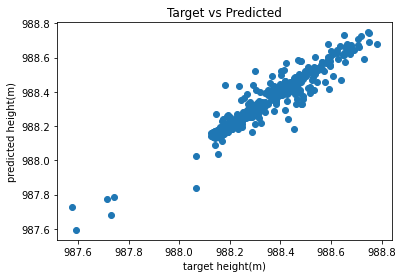

In [9]:

def make_prediction(DataFrame,number): 
    input_Data = finalDF.iloc[:,0:19]
    target_Data = finalDF.iloc[:,19]
    lm = LinearRegression()
    lm.fit(input_Data,target_Data)
    y_pred1 = lm.predict(input_Data)
    plt.scatter(target_Data,y_pred1)
    plt.xlabel("target height(m)")
    plt.ylabel("predicted height(m)")
    plt.title("Target vs Predicted")
    plt.scatter
    # x axis is actual height and y is what lm model is predicting in scatter
    X_train, X_test, y_train, y_test = train_test_split(input_Data, target_Data,test_size = number, random_state=50)
    model = lm.fit(X_train,y_train)
    prediction = lm.predict(X_test)
    #Series of the difference of the test the leng
    error_Series = y_test-prediction
    #average
    average_Difference = sum(error_Series/len(error_Series))
    #print(average_Difference)
    print(to_precision(average_Difference,4))

make_prediction(tzDF,0.35)

When y_test-y_prediciton, we get an average difference of -0.0003 from the model's actual and predicted values in the above cell. From the outliers in the plot, we can view the noise graphically.

## 55% Test Data demonstration

6.461e-3


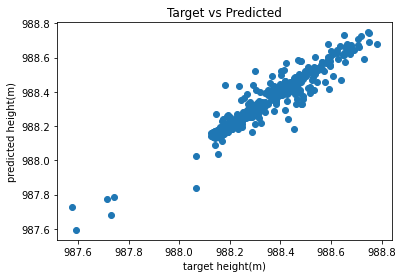

In [10]:
#Function Call for 55% test data dem
make_prediction(tzDF,0.55)

In the above cell, when y_test-y_prediciton, we get an average difference of -0.00030778063659289 from the model's actual and predicted values.

## 75% Test Data demonstration

3.258e-3


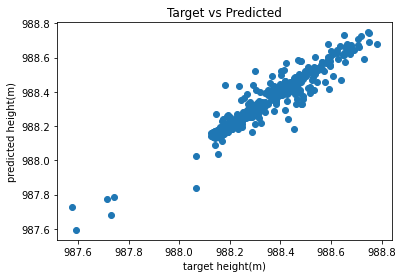

In [11]:
#Function Call for 75% test data dem
make_prediction(tzDF,0.75)

In the above cell when y_test-y_prediciton we get an average difference of -0.0001 from the model's actual and predicted values.

## Using one day's data to predict a different day's data

The demonstrations below utilize the second data frame now named finalDF_two. The December 16, 2020 dates data will be trained to predict the April 16, 2020 dates data. The test size increases by ten percent in the range of 20-90 for variability. We will be using the Mean Squared value that shows the error for linear regression to view the model's accuracy.

## Prediction from 10% test size data

In [12]:
def different_Day_Prediction(DataFrame,number):
    DECEMBER_SERIES_X  = finalDF.iloc[:,0:19]
    DECEMBER_SERIES_Y = finalDF.iloc[:,19]
    APRIL_SERIES_X = finalDF_two.iloc[:,0:19]
    APRIL_SERIES_Y= finalDF_two.iloc[:,19]
    lm.fit(DECEMBER_SERIES_X,DECEMBER_SERIES_Y)
    y_pred1 = lm.predict(DECEMBER_SERIES_X)
    #train_test_split_module
    X_train, X_test, y_train, y_test = train_test_split(DECEMBER_SERIES_X, APRIL_SERIES_Y, test_size=number,random_state=50)
    model = lm.fit(X_train,y_train)
    model.intercept_
    model.coef_
    #setting the prediciton variable 
    APRIL_PREDICTION = model.predict(APRIL_SERIES_X)
    #50 bins were picked for all of the models below
    #Distrubution of Errors pred vs actual
    plt.hist(APRIL_PREDICTION-APRIL_SERIES_Y,bins = 50,color ="black")
    plt.xlabel("meters(m)")
    plt.ylabel("distribution")
    plt.title("Distrbution of predicted minus actual")
    plt.show()
    #Displaying Mean Squared Error
    twenty_MSE = mean_squared_error(APRIL_SERIES_Y,APRIL_PREDICTION)
    print("The mean squared error for this model is",to_precision(twenty_MSE,4),"%.")

#different_Day_Prediction(tzDF,.1)

## Prediction from 20% test size data

In the cell below, december_Series_X and decemeber_Series_Y will be the data that is used to train the model. April_Series_X and april_Series_Y will be the different days and data that we predict it points from. We will display a histogram to view the error distribution between the actual and predicted data as well as 

In [13]:
#different_Day_Prediction(tzDF,.2)

In the above cell, the histogram displayed displays the error from the prediction minus the series. Most of the distribution of the data is centered around zero, indicating the performance of the model. The MSE is extremely low, showing the accuracy of the model.

## Prediction from 30% test size data

In the cell below our we will be inputting in 30% test data.

In [14]:
#different_Day_Prediction(tzDF,.3)

## Prediction from 40% test size data

In [15]:
#different_Day_Prediction(tzDF,.4)

## Prediction from 50% test size data

In [16]:
#different_Day_Prediction(tzDF,.5)

## Prediction from 60% test size data

In [17]:
#different_Day_Prediction(tzDF,.6)

## Prediction from 70% test size data

In [18]:
#different_Day_Prediction(tzDF,.7)

## Prediction from 80% test size data

In [19]:
#different_Day_Prediction(tzDF,.8)

## Prediction from 90% test size data

In [20]:
#different_Day_Prediction(tzDF,.9)

The mean square error for the above models is deficient, showing the success of inputting in height data for one day and predicting height data from another day.

# Results

With this notebook we explored the use of machine learning for predictive analytics applied to vertical surface motions at an active volcano in Tanzania, Ol Doinyo Lengai. When training a model on one day and using that model to predict height values from another day, our lowest error was 8.325e-5 %. The future implications for this project and data are important because Ol Doinyo Lengai future eruption could cause distress for not only Tanzania, but other countries surrounding Tanzania. The ability to predict volcanic activity will be a valuable contribution to volcanic hazards assessment.

# References



Daniels, Mike, Branko Kerkez, V. Chandrasekar, Sara Graves, D. Sarah Stamps, Charles Martin, Aaron Botnick, Michael Dye, Ryan Gooch, Josh Jones, Ken Keiser, Matthew Bartos, Thaovy Nguyen, Robyn Collins, Sophia Chen, Terrie Yang, Abbi Devins-Suresh (2016). Cloud-Hosted Real-time Data Services for the Geosciences (CHORDS) software (Version 1.0.1). UCAR/NCAR - EarthCube. https://doi.org/10.5065/d6v1236q

Kerkez, Branko, Michael Daniels, Sara Graves, V. Chandrasekar, Ken Keiser, Charlie Martin, Michael Dye, Manil Maskey, and Frank Vernon. "Cloud Hosted Real‐time Data Services for the Geosciences (CHORDS)." (2016), doi: 10.1002/gdj3.36. 

GeÌ ron, Aureì lien. 2019. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2nd ed. CA 95472: O’Reilly.

Stamps, D. S., Saria, E., Ji, K. H., Jones, J. R., Ntambila, D., Daniels, M. D., &amp; Mencin, D. (2016). <i>Real-time data from the Tanzania Volcano Observatory at the Ol Doinyo Lengai volcano in Tanzania (TZVOLCANO).</i> UCAR/NCAR - EarthCube. https://doi.org/10.5065/D6P849BM

# Different Day Observation

In [21]:
def different_Day_Prediction(DataFrame,number):
    DECEMBER_SERIES_X  = finalDF.iloc[:,0:19]
    DECEMBER_SERIES_Y = finalDF.iloc[:,19]
    APRIL_SERIES_X = finalDF_two.iloc[:,0:19]
    APRIL_SERIES_Y= finalDF_two.iloc[:,19]
    lm.fit(DECEMBER_SERIES_X,DECEMBER_SERIES_Y)
    y_pred1 = lm.predict(DECEMBER_SERIES_X)
    #train_test_split_module
    X_train, X_test, y_train, y_test = train_test_split(DECEMBER_SERIES_X, APRIL_SERIES_Y, test_size=number,random_state=50)
    model = lm.fit(X_train,y_train)
    model.intercept_
    model.coef_
    #setting the prediciton variable 
    APRIL_PREDICTION = model.predict(APRIL_SERIES_X)
    #50 bins were picked for all of the models below
    #Distrubution of Errors pred vs actual
    plt.hist(APRIL_PREDICTION-APRIL_SERIES_Y,bins = 50,color ="black")
    plt.xlabel("meters(m)")
    plt.ylabel("distribution")
    plt.title("Distrbution of predicted minus actual")
    plt.show()
    #Displaying Mean Squared Error
    twenty_MSE = mean_squared_error(APRIL_SERIES_Y,APRIL_PREDICTION)
    print("The mean squared error for this model is",to_precision(twenty_MSE,4),"%.")


In [22]:
#different_Day_Prediction(tzDF3,0.1)

In [23]:
#different_Day_Prediction(tzDF3,0.2)

In [24]:
#different_Day_Prediction(tzDF3,0.4)

In [25]:
#different_Day_Prediction(tzDF3,0.1)

# Gaussian Mixture 

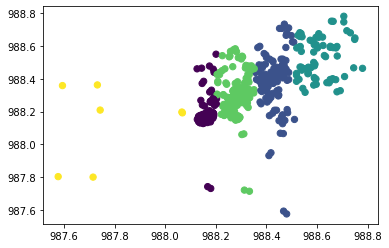

In [26]:
DECEMBER_SERIES_X  = finalDF.iloc[:,19].values.reshape(-1, 1)
DECEMBER_SERIES_Y = finalDF.iloc[:,1].values.reshape(-1, 1)

from sklearn.mixture import GaussianMixture
#from sklearn.mixture import GMM
gmm = GaussianMixture(n_components=5).fit(DECEMBER_SERIES_X )
labels = gmm.predict(DECEMBER_SERIES_X )
plt.scatter(DECEMBER_SERIES_X ,DECEMBER_SERIES_Y, c=labels, s=40, cmap='viridis');
#DECEMBER_SERIES_Y

# DB Scan

In [29]:
'''
First calc average height, then the maximum height, find the minimum height, 
find difference between avg and max or avg and min pick whichever value seems best
for the epsilon value; i.e don’t eyeball for the epsilon value do it programmatically. 
Find the shortest distance either from the max and min from the average.
'''

#X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
#X = StandardScaler().fit_transform(X)
#y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
#plt.scatter(X[:,0], X[:,1], c=y_pred)
#It is an array

#type(X[:,0]

'\nFirst calc average height, then the maximum height, find the minimum height, \nfind difference between avg and max or avg and min pick whichever value seems best\nfor the epsilon value; i.e don’t eyeball for the epsilon value do it programmatically. \nFind the shortest distance either from the max and min from the average.\n'

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter
'''
plt.plot(tzDF["measurements_height"],tzDF["timeconvert"])
tzData = tzDF[["measurements_height","timeconvert"]]
tzData = tzData.values.astype("float32",copy=False)
tzData_scaler = StandardScaler().fit(tzData)
tzData = tzData_scaler.transform(tzData)
tzData

model = DBSCAN(eps=0.3, min_samples=10).fit(tzData)
outliers_df = tzData[model.labels_ == -1]
clusters_df = tzData[model.labels_ != -1]
model.labels_
colors = model.labels_
colors_clusters = colors[colors != -1]
colors_outliers = "black"

#cluster info 
clusters = Counter(model.labels_)
print(clusters)
#print(tzData[model.labels_==-1].head())
print("Number of cluster = {}".format(len(clusters)-1))

#plot clusters and outliers
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.scatter(clusters_df["measurements_height"],clusters_df["timeconvert"],
           c = colors_clusters, edgecolors = "black", s= 50)

ax.scatter(outliers_df["measurements_height"],outliers_df["timeconvert"],
           c = colors_clusters, edgecolors = "black", s= 50)
ax.set_x_label("Height",family= "Arial",fontsize = 9)
ax.set_x_label("Time",family= "Arial",fontsize = 9)
plt.grid(which = "major",color="#cccccc",alpha=0.45)
plt.show()
'''

'\nplt.plot(tzDF["measurements_height"],tzDF["timeconvert"])\ntzData = tzDF[["measurements_height","timeconvert"]]\ntzData = tzData.values.astype("float32",copy=False)\ntzData_scaler = StandardScaler().fit(tzData)\ntzData = tzData_scaler.transform(tzData)\ntzData\n\nmodel = DBSCAN(eps=0.3, min_samples=10).fit(tzData)\noutliers_df = tzData[model.labels_ == -1]\nclusters_df = tzData[model.labels_ != -1]\nmodel.labels_\ncolors = model.labels_\ncolors_clusters = colors[colors != -1]\ncolors_outliers = "black"\n\n#cluster info \nclusters = Counter(model.labels_)\nprint(clusters)\n#print(tzData[model.labels_==-1].head())\nprint("Number of cluster = {}".format(len(clusters)-1))\n\n#plot clusters and outliers\nfig = plt.figure()\nax = fig.add_axes([.1,.1,1,1])\n\nax.scatter(clusters_df["measurements_height"],clusters_df["timeconvert"],\n           c = colors_clusters, edgecolors = "black", s= 50)\n\nax.scatter(outliers_df["measurements_height"],outliers_df["timeconvert"],\n           c = color

In [39]:
#Finding Optimal Episilon value 
from sklearn.neighbors import NearestNeighbors
'''
X = tzDF["measurements_height"]
X = X.values.reshape(1,-1)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

#distances = np.sort(distances, axis=0)
#distances = distances[:,1]
#plt.plot(distances)
distances
'''
#Scale the data before applying chunck below 
max_tzDF = max(tzDF["measurements_height"])
min_tzDF = min(tzDF["measurements_height"])
mean_tzDF = tzDF["measurements_height"].mean()

dif_Mean_Max = mean_tzDF - max_tzDF
dif_Mean_Min = mean_tzDF - min_tzDF
min_Mean_Differnces = min(dif_Mean_Max,dif_Mean_Min)

#dif_Mean_Max is the optimal episllon value with this approach 


51273


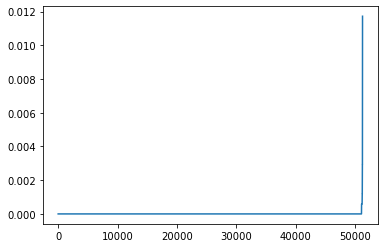

In [40]:
#Scale data
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

pre_Scale_Height = tzDF["measurements_height"].values.reshape(-1,1)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(pre_Scale_Height)
scaled[0][0]



neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled)
distances, indices = nbrs.kneighbors(scaled) 
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
max(distances)


# Max occures when x = 5998

print(np.argmax(distances,axis=0))
distances

#distances
#np.argmax(a, axis=1)
'''
max_tzDF = max(scaled)
min_tzDF = min(scaled)
mean_tzDF = scaled.mean()
dif_Mean_Max = mean_tzDF - max_tzDF
dif_Mean_Min = mean_tzDF - min_tzDF
min_Mean_Differnces = min(dif_Mean_Max,dif_Mean_Min)
print(min_Mean_Differnces)
'''
distances = np.sort(distances, axis=0)
#distances = distances[distances[:,1]]
#plt.plot(distances)

#distances.shape()




In [ ]:
#NEAREST NEIGHBOR
from sklearn.neighbors import NearestNeighbors
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
pre_Scale_Height = tzDF["measurements_height"].values.reshape(-1,1)

scaler = MinMaxScaler()

scaled = scaler.fit_transform(pre_Scale_Height)
nbrs = NearestNeighbors(n_neighbors=3, metric='cosine').fit(scaled)
distances, indices = nbrs.kneighbors(scaled)
m = DBSCAN(eps=0.55408633, min_samples=4).fit(distances)

#clusters = m.lables_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))
"""
distances = distances[:,2]
distances = np.sort(distances, axis=0)
plt.plot(distances)
plt.show()
distances[0].max()
indices


# Applying DBSCAN

In [41]:
from sklearn.neighbors import NearestNeighbors
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#Scaling
pre_Scale_Height = tzDF["measurements_height"].values.reshape(-1,1)
pre_Scale_Time = tzDF["timeconvert"].values.reshape(-1,1)
scaled = scaler.fit_transform(pre_Scale_Height)
scaled_Two = scaler.fit_transform(pre_Scale_Time)
""""
args:
A dataframe, number of neighbors, minmium sample points, and an 
episilon value for the nearest neighbor algorithm to be executed.
return:
    Nothing a DBSCAN algorithm is shown on the dataset graphically.
"""

def make_DBSCAN(DataFrame,numNeigh,min_Samp,Episilon):
    #Input for the algorithm
    
    
    #Scaling the height of the data between 0 & 1
    scaler = MinMaxScaler()

    scaled_Two = scaler.fit_transform(pre_Scale_Time)
    nbrs = NearestNeighbors(n_neighbors = numNeigh).fit(scaled)
    distances, indices = nbrs.kneighbors(scaled) 

    distances = np.sort(distances, axis=0)
    distances = distances[:,4]
    
    db = DBSCAN(eps = Episilon,  min_samples = min_Samp)
    db.fit(scaled)
    y_pred = db.fit_predict(scaled)
    plt.figure(figsize=(20,12))
    plt.title("DBSCAN")
    plt.scatter(pre_Scale_Time,pre_Scale_Height,c=y_pred, cmap='Paired',s=10)
    print(len(set(db.labels_)))
   
    
#One common approach is to make minPoints = log(number of points)
ln_Data_Points= np.log(5990)
 


# Varying min points

4


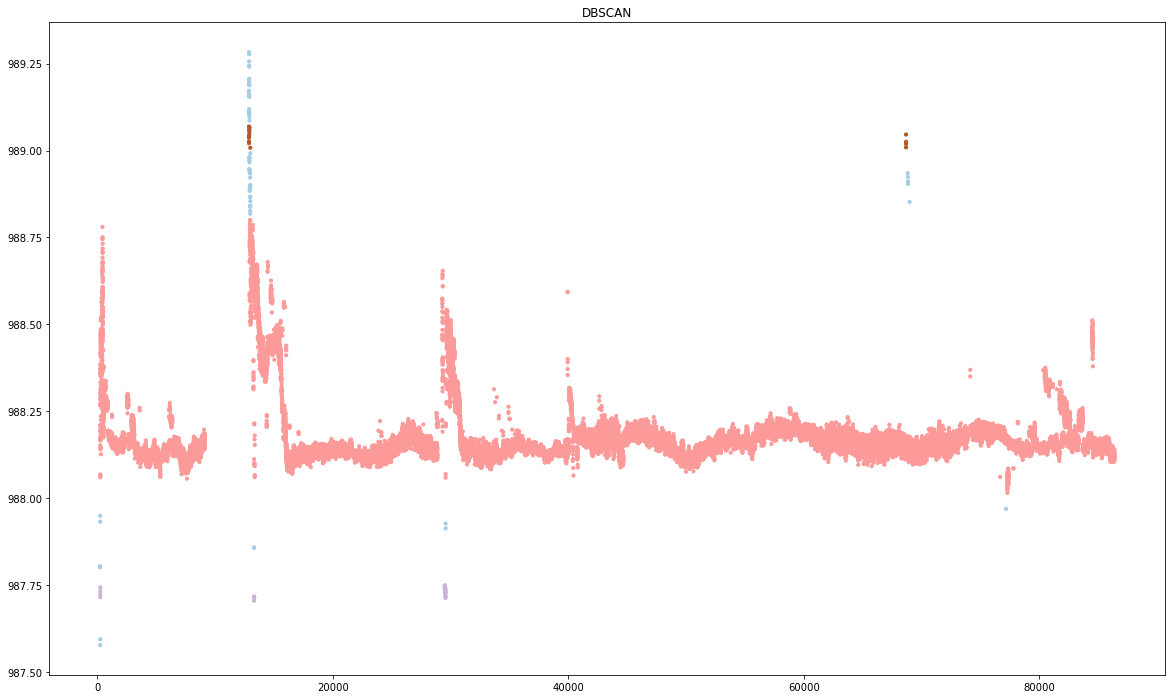

In [33]:
#10 min points
make_DBSCAN(tzDF,10,ln_Data_Points,0.01)   



4


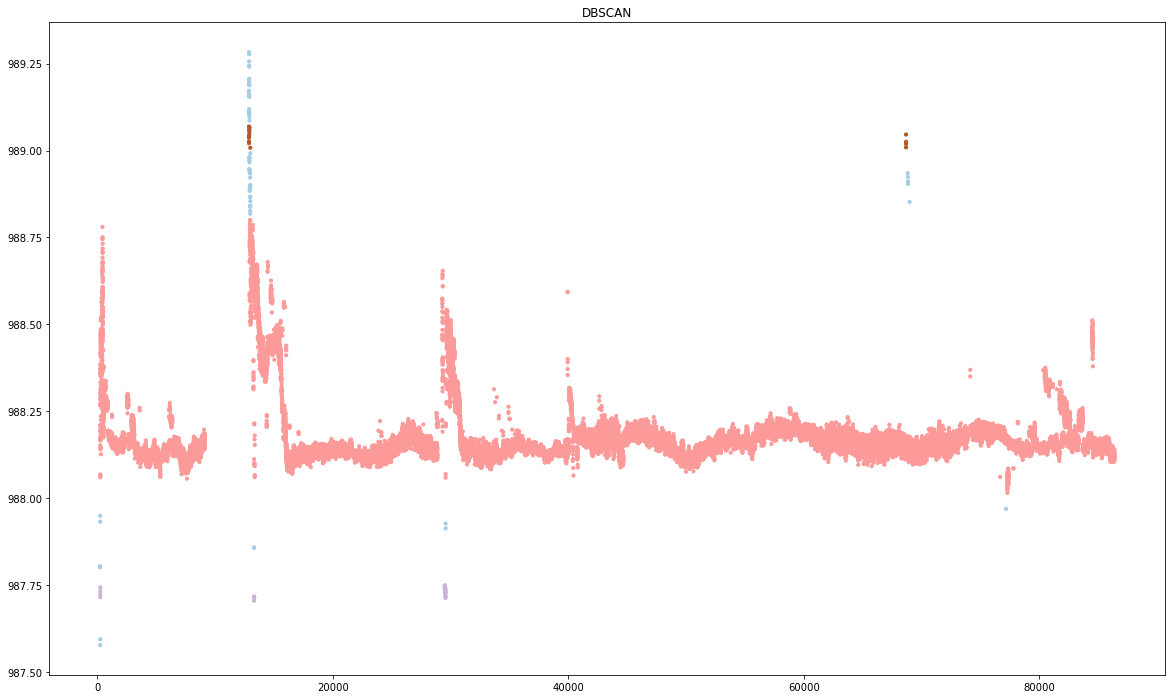

In [34]:
#20 points
make_DBSCAN(tzDF,20,ln_Data_Points,0.01)   



In [35]:
#print(db.labels_)

NameError: name 'db' is not defined

4


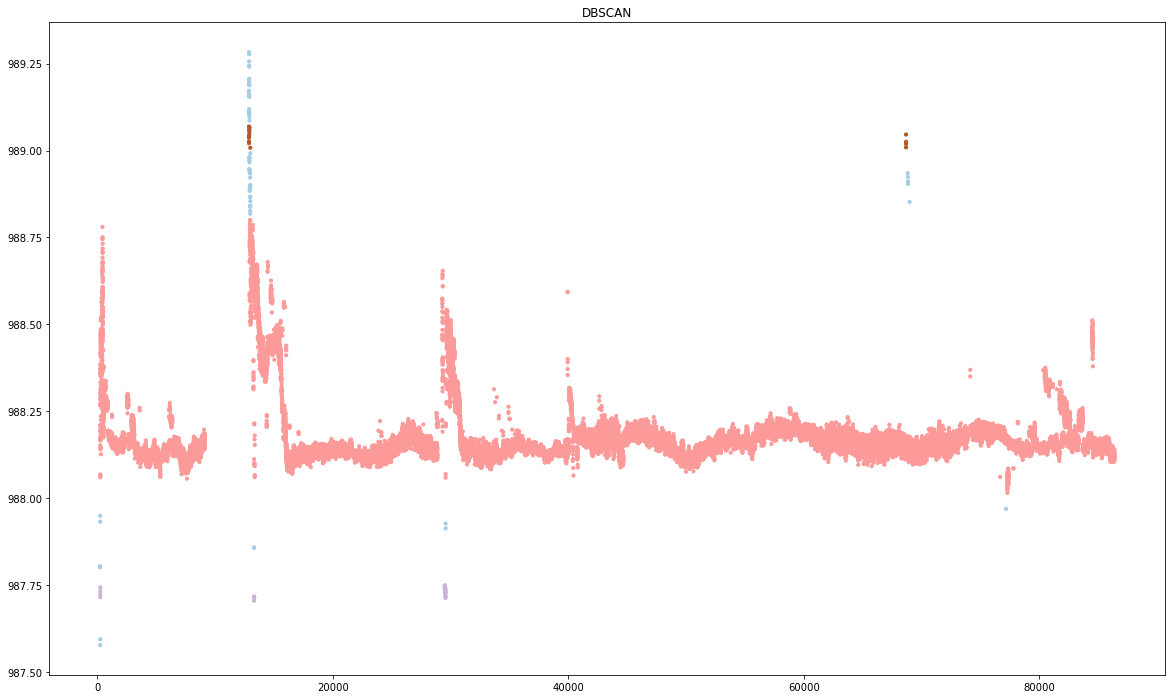

In [49]:
#30 points
make_DBSCAN(tzDF,30,ln_Data_Points,0.01)
 



1


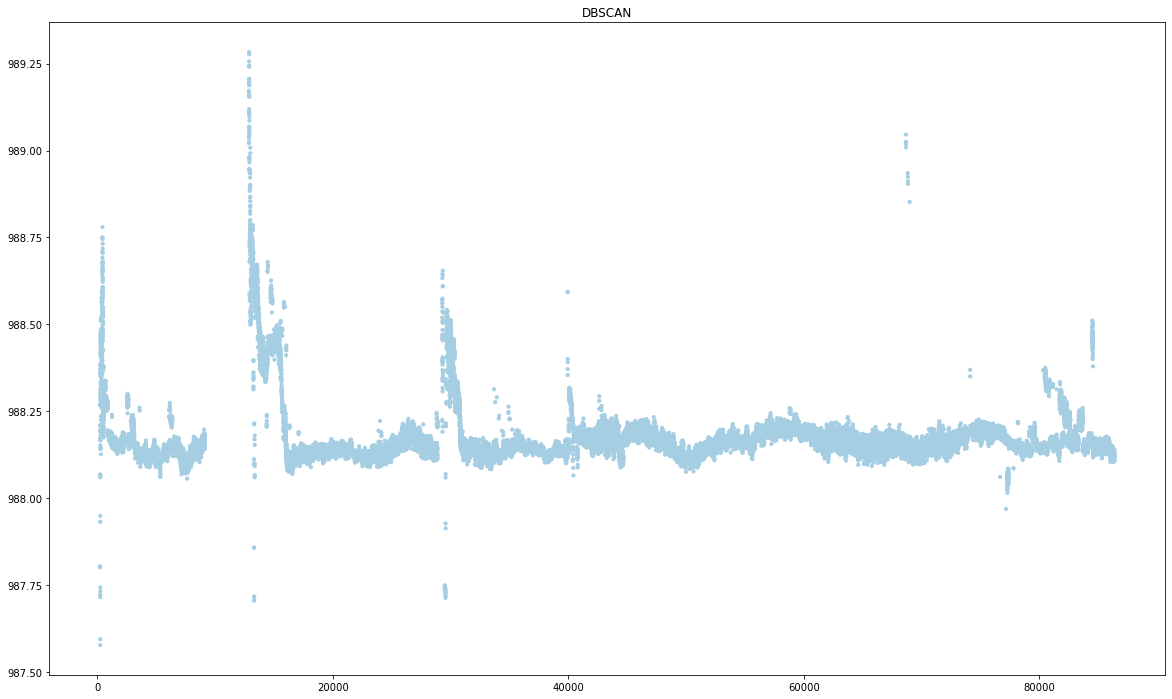

In [50]:
322#40 points
make_DBSCAN(tzDF,40,ln_Data_Points,0.1)   



In [ ]:
#50 points
make_DBSCAN(tzDF,50,ln_Data_Points,0.01)   



# Changing Number of Neighbors

In [ ]:
#
make_DBSCAN(tzDF,5,10,0.01)   


28


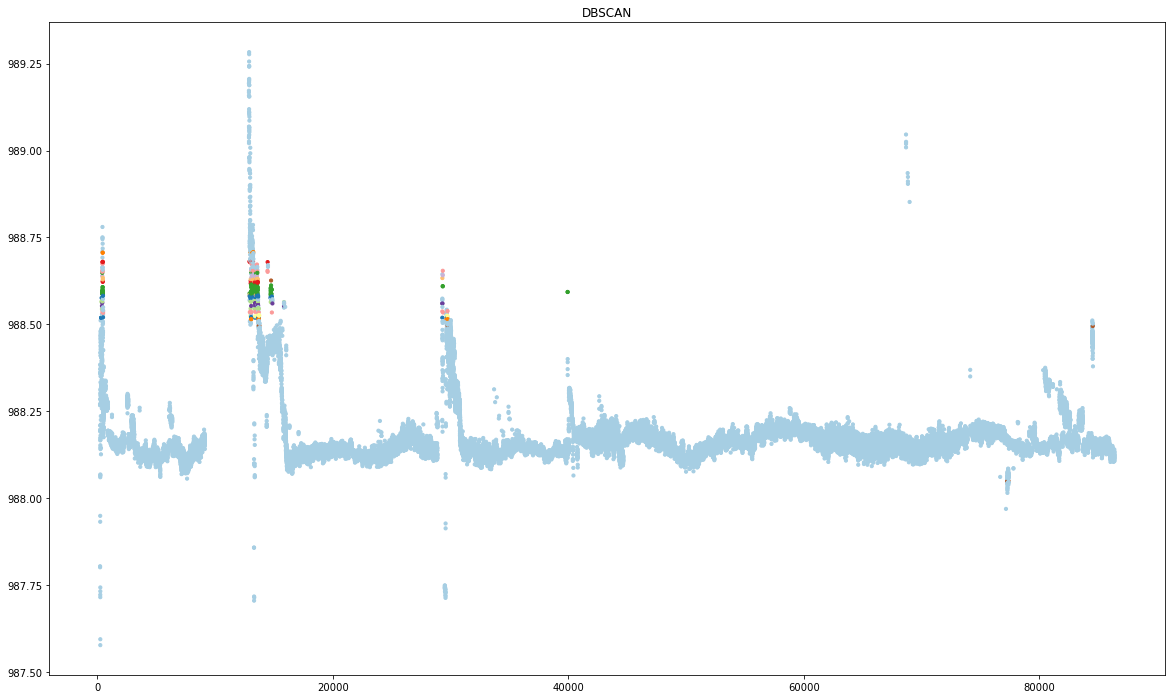

In [51]:

make_DBSCAN(tzDF,20,ln_Data_Points,0.001)   



In [47]:
from kneed import DataGenerator, KneeLocator
#Point of maximum curveature
x = scaled
y = scaled_Two
def findKneeLocator():
    kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)


plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')


ModuleNotFoundError: No module named 'kneed'